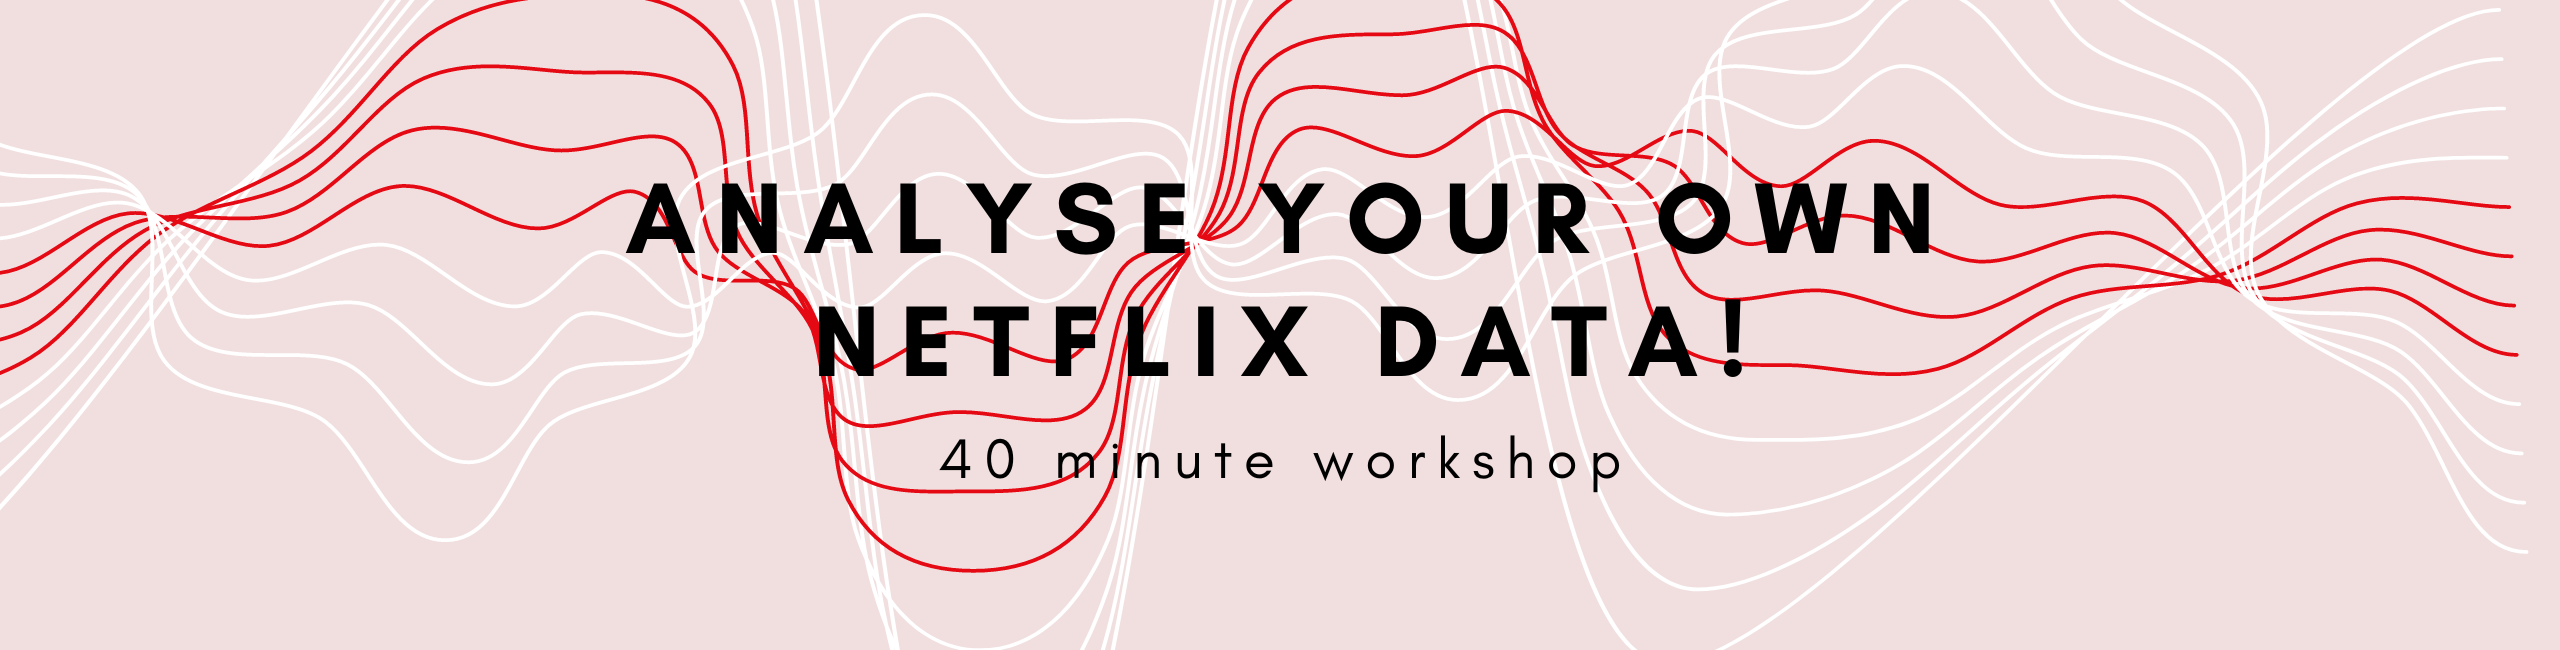

In [1]:
from IPython.display import Image
Image(filename='netflix_banner_jupyter.png') 

# Step 1. Look through Netflix raw data, import libraries 

The data provided by Netflix offers all kinds of information. For the purpose of this workshop, we will only be looking at

 `netflix-report > CONTENT_INTERACTION > ViewingActivity`, 
 
as it is the CSV that provides the most information on viewing habits. 

Feel free to explore the other folders! :)

In [2]:
# import any libraries you may need 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load in the data
df = pd.read_csv('ViewingActivity.csv')

# Step 2. Explore & tidy the data
Right off the bat, the column names are a bit verbose for my liking. 

Aditionally, I am only interested in my own data. Everything else can go. 

In [4]:
# inspect data
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Joe Cho,2022-09-18 14:37:45,00:06:58,NaN,Inside Men,NaN,Android DefaultWidevineL3Phone Android Phone,02:06:54,02:06:54,"KR (Korea, Republic of)"
1,Joe Cho,2022-09-18 14:33:14,00:02:32,NaN,17 Again,NaN,Android DefaultWidevineL3Phone Android Phone,00:04:59,00:04:59,"KR (Korea, Republic of)"
2,Joe Cho,2022-09-18 09:19:29,00:08:30,NaN,The Figo Affair: The Transfer that Changed Foo...,NaN,Android DefaultWidevineL3Phone Android Phone,00:16:57,00:16:57,"KR (Korea, Republic of)"
3,Joe Cho,2022-09-18 09:16:27,00:00:05,NaN,Squid Game: Season 1: Front Man (Episode 8),NaN,Android DefaultWidevineL3Phone Android Phone,00:00:08,00:00:08,"KR (Korea, Republic of)"
4,Joe Cho,2022-09-18 09:06:07,00:09:53,NaN,Squid Game: Season 1: VIPS (Episode 7),NaN,Android DefaultWidevineL3Phone Android Phone,00:52:25,00:52:25,"KR (Korea, Republic of)"


In [5]:
# rename columns for easier access 
df.columns = ['name', 'start', 'duration', 'attrs', 'title', 'svt', 'device', 'bookmark', 'latestbookmark', 'country'] 

In [6]:
# select only my personal data
df = df[df.name == 'NIKULSKI LAURA']

In [7]:
# on second thought, drop irrelevant columns 
df = df.drop(['name', 'attrs', 'svt', 'bookmark', 'latestbookmark', 'device', 'country'], axis=1)

In [8]:
df.head()

,start,duration,title
4648,2022-09-18 15:59:04,00:22:44,Friends: Season 3: The One with the Dollhouse ...
4649,2022-09-18 14:39:27,00:21:32,"Crouching Tiger, Hidden Dragon"
4650,2022-09-16 20:05:56,00:12:41,Friends: Season 3: The One with the Tiny T-Shi...
4651,2022-09-16 20:04:12,00:01:19,Season 1 Trailer: SPY x FAMILY
4652,2022-09-16 20:03:36,00:00:16,Spencer_hook_02_16x9


In [9]:
# no missing values, all datatypes are objects (string format)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 4648 to 7365
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   start     2718 non-null   object
 1   duration  2718 non-null   object
 2   title     2718 non-null   object
dtypes: object(3)
memory usage: 84.9+ KB


In [10]:
df.describe()

,start,duration,title
count,2718,2718,2718
unique,2711,1231,857
top,2022-06-12 12:44:26,00:00:02,Corpse Bride
freq,2,63,49


### Things I've learnt so far
- the title I've watched the most: Corpse Bride 
- top duration: 2 seconds (apparently I have fumble fingers)

# Step 3. Create research questions and analysis

`Q1. What are my top 5 most re-watched titles?` 

`Q2. What are my top 5 titles in terms of watchtime?`

`Q3. What day of the week/hour of the day do I usually watch Netflix?`

## Q1 Top rewatched
Apparently, I *really* love Corpse Bride and rewatch it over __everything__ else: 

In [11]:
toptitles = df.title.value_counts().head()

In [12]:
print(toptitles)

Corpse Bride                                                                          49
A Series of Unfortunate Events: Season 2: The Austere Academy: Part 2 (Episode 2)     24
A Series of Unfortunate Events: Season 3: Slippery Slope: Part 2 (Episode 2)          21
A Series of Unfortunate Events: Season 2: The Hostile Hospital: Part 2 (Episode 8)    18
A Series of Unfortunate Events: Season 2: The Hostile Hospital: Part 1 (Episode 7)    18
Name: title, dtype: int64


In [13]:
# convert series back to dataframe for visualisation 
topdf = pd.DataFrame({'titles': toptitles.index, 'counts': toptitles.values})

In [14]:
topdf

,titles,counts
0,Corpse Bride,49
1,A Series of Unfortunate Events: Season 2: The ...,24
2,A Series of Unfortunate Events: Season 3: Slip...,21
3,A Series of Unfortunate Events: Season 2: The ...,18
4,A Series of Unfortunate Events: Season 2: The ...,18


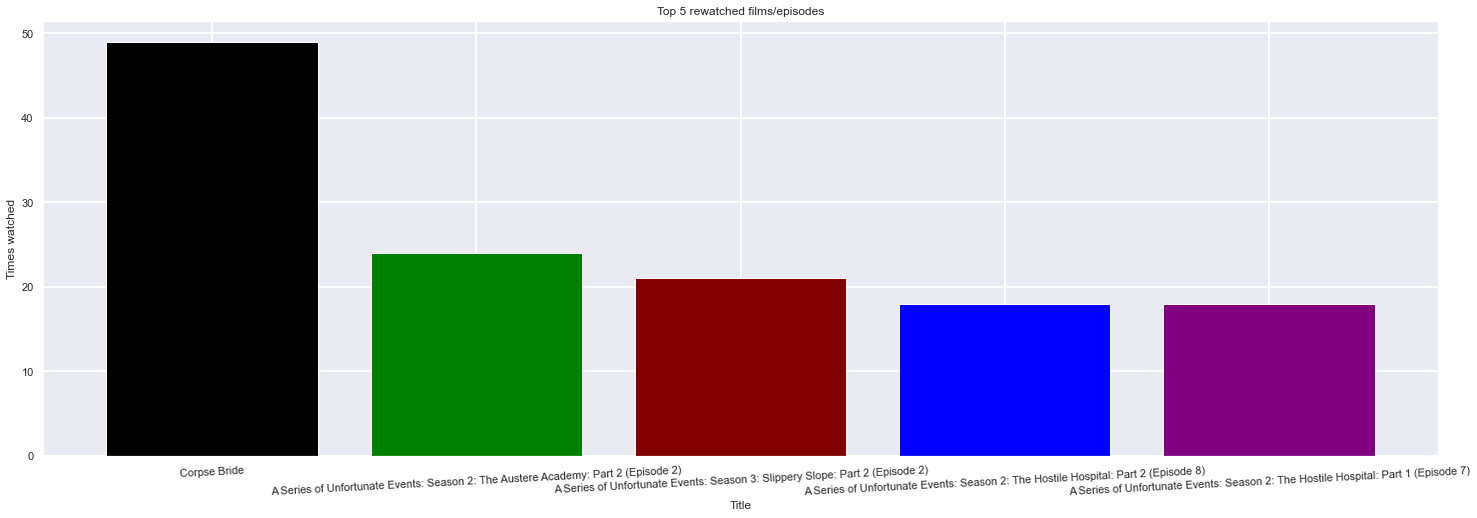

<Figure size 432x288 with 0 Axes>

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

x = topdf.titles
y = topdf.counts

# custom colours used as some titles will be reused in another graphic below
plt.bar(x, y, color=['black', 'green', 'maroon', 'blue', 'purple'])
# colours you can directly access within matplotlib: aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, purple, red, silver, teal, white, yellow 

plt.ylabel('Times watched')
plt.xlabel('Title')
plt.title('Top 5 rewatched films/episodes')
plt.xticks(topdf.titles, rotation = 3)

plt.show()
plt.clf()

# Q2 Longest watched 

Prior to being able to analyse your watch data, you'll need to convert the duration and start date to time and date formats. 

### Convert duration to timedelta format (Pandas measure of time duration)

In [20]:
df.duration = pd.to_timedelta(df.duration)

In [21]:
df.head()

,start,duration,title
4648,2022-09-18 15:59:04,0 days 00:22:44,Friends: Season 3: The One with the Dollhouse ...
4649,2022-09-18 14:39:27,0 days 00:21:32,"Crouching Tiger, Hidden Dragon"
4650,2022-09-16 20:05:56,0 days 00:12:41,Friends: Season 3: The One with the Tiny T-Shi...
4651,2022-09-16 20:04:12,0 days 00:01:19,Season 1 Trailer: SPY x FAMILY
4652,2022-09-16 20:03:36,0 days 00:00:16,Spencer_hook_02_16x9


### Sum up watchtime by title

In [22]:
df[['title', 'duration']].groupby('title').sum().sort_values(by='duration', ascending = False).head(20)


,duration
title,
Corpse Bride,0 days 20:04:22
A Series of Unfortunate Events: Season 2: The Austere Academy: Part 1 (Episode 1),0 days 08:13:04
A Series of Unfortunate Events: Season 2: The Austere Academy: Part 2 (Episode 2),0 days 06:59:45
A Series of Unfortunate Events: Season 2: The Hostile Hospital: Part 1 (Episode 7),0 days 06:37:05
A Series of Unfortunate Events: Season 3: Penultimate Peril: Part 1 (Episode 5),0 days 06:31:10
A Series of Unfortunate Events: Season 3: Slippery Slope: Part 1 (Episode 1),0 days 05:59:44
A Series of Unfortunate Events: Season 3: Penultimate Peril: Part 2 (Episode 6),0 days 05:36:30
A Series of Unfortunate Events: Season 3: Slippery Slope: Part 2 (Episode 2),0 days 04:59:33
A Series of Unfortunate Events: Season 2: The Vile Village: Part 1 (Episode 5),0 days 04:30:40


> ### You may have to use your own discretion and go over your favourite show (rather than an individual film) that you know you watch often. 

- use Timedelta to convert time to total amount in hours
- use regex=False to tell Pandas that it is not a regular expression - it is to be treated as a regular expression

In [23]:
# no regex because I know the exact title  
cpduration = df.duration[df.title == 'Corpse Bride'].sum() / pd.Timedelta(hours=1)
print(cpduration)

20.072777777777777


In [24]:
asoe = df[df.title.str.contains('A Series of Unfortunate Events', regex=False)]
asoeduration = asoe.duration.sum() / pd.Timedelta(hours=1)
print(asoeduration)

88.83972222222222


In [25]:
friends = df[df.title.str.contains('Friends', regex=False)]
friendsduration = friends.duration.sum() / pd.Timedelta(hours=1)
print(friendsduration)

326.7225


In [26]:
blackmirror = df[df.title.str.contains('Black Mirror', regex=False)]
bmduration = blackmirror.duration.sum() / pd.Timedelta(hours=1)
print(bmduration)

19.72861111111111


In [27]:
# Love, Death and Robots did not make the top 5
ldar = df[df.title.str.contains('Love, Death & Robots', regex=False)]
ldarduration = ldar.duration.sum() / pd.Timedelta(hours=1)
print(ldarduration)

5.238888888888889


In [28]:
itcrowd = df[df.title.str.contains('The IT Crowd', regex=False)]
itcrowdduration = itcrowd.duration.sum() / pd.Timedelta(hours=1)
print(itcrowdduration)

16.785555555555554


In [29]:
# Monty Python did not make the cut either
montypython = df[df.title.str.contains('Monty Python', regex=False)]
montypythonduration = montypython.duration.sum() / pd.Timedelta(hours=1)
print(montypythonduration)

7.015555555555555


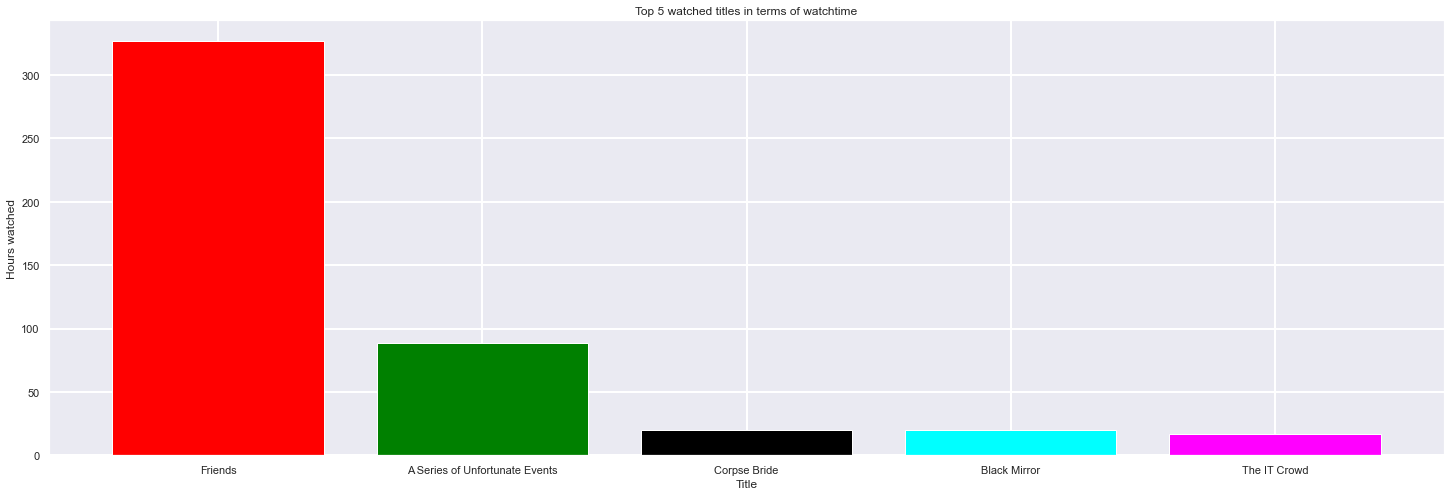

<Figure size 432x288 with 0 Axes>

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

x=['Friends', 'A Series of Unfortunate Events', 'Corpse Bride', 'Black Mirror', 'The IT Crowd']
y=[friendsduration, asoeduration, cpduration, bmduration, itcrowdduration]

plt.bar(x, y, color=['red', 'green', 'black', 'aqua', 'fuchsia'])

plt.ylabel('Hours watched')
plt.xlabel('Title')
plt.title('Top 5 watched titles in terms of watchtime')

plt.show()
plt.clf()

## Q3. Watch events by weekday and hour of day
### Convert start to local time and date format 
- The start time provided by Netflix is Coordinated Universal Time (UTC), so you need to change the format and then move the time over to your local time zone (Korean standard time - KST, in my case). 

- hours go from 0 to 23, days go from 0 to 6 Monday - Sunday

- Index needs to be reset as conversion can only happen if the column is on a DateTimeIndex. 

- Find your own time zone here: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

In [31]:
df.start = pd.to_datetime(df.start, utc=True)

In [32]:
df = df.set_index('start')

In [33]:
df.index = df.index.tz_convert('Asia/Seoul')

In [34]:
df = df.reset_index()

In [36]:
df['day'] = df.start.dt.weekday
df['hour'] = df.start.dt.hour

In [37]:
df.head()

,start,duration,title,day,hour
0,2022-09-19 00:59:04+09:00,0 days 00:22:44,Friends: Season 3: The One with the Dollhouse ...,0,0
1,2022-09-18 23:39:27+09:00,0 days 00:21:32,"Crouching Tiger, Hidden Dragon",6,23
2,2022-09-17 05:05:56+09:00,0 days 00:12:41,Friends: Season 3: The One with the Tiny T-Shi...,5,5
3,2022-09-17 05:04:12+09:00,0 days 00:01:19,Season 1 Trailer: SPY x FAMILY,5,5
4,2022-09-17 05:03:36+09:00,0 days 00:00:16,Spencer_hook_02_16x9,5,5


In [38]:
# set days Monday-Sunday
df['day'] = pd.Categorical(df['day'], categories=[0,1,2,3,4,5,6], ordered=True)

In [39]:
# create data per day and sort by day using sort_index function
df_per_day = df['day'].value_counts().sort_index()

In [40]:
print(df_per_day)

0    329
1    303
2    309
3    224
4    275
5    595
6    683
Name: day, dtype: int64


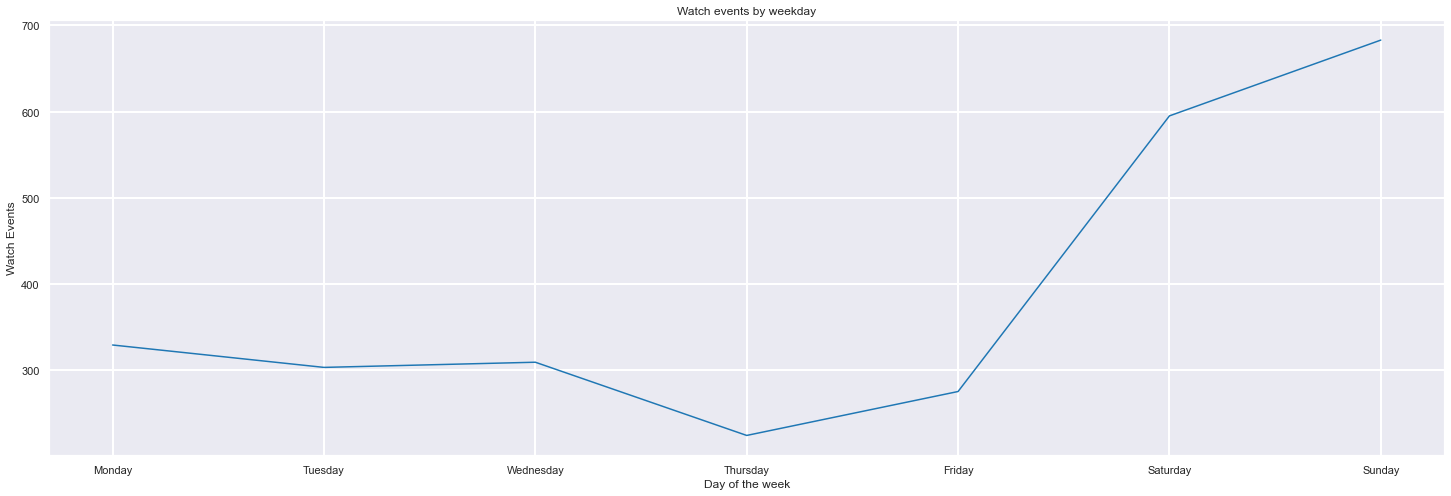

<Figure size 432x288 with 0 Axes>

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

plt.plot(df_per_day)

days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.ylabel('Watch Events')
plt.xlabel('Day of the week')
plt.xticks(ticks = range(7), labels=days_of_the_week)
plt.title('Watch events by weekday')

plt.show()
plt.clf()

In [45]:
# set days Monday-Sunday
df['hour'] = pd.Categorical(df['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [46]:
# create data per hour and sort by hour using sort_index function
df_per_hour = df['hour'].value_counts().sort_index()

In [47]:
print(df_per_hour)

0     462
1     764
2     275
3      49
4      41
5      45
6       9
7      11
8      14
9      55
10     39
11     38
12     25
13     51
14    106
15     68
16     69
17     51
18     53
19     44
20     43
21     82
22    114
23    210
Name: hour, dtype: int64


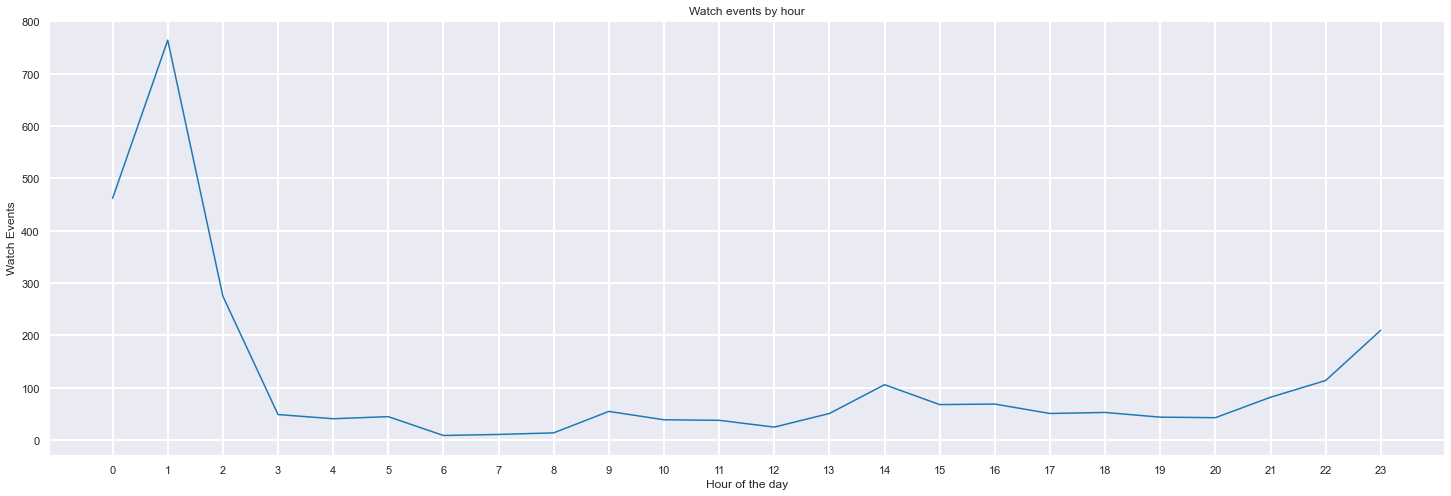

<Figure size 432x288 with 0 Axes>

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

plt.plot(df_per_hour)

hours_per_day = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.ylabel('Watch Events')
plt.xlabel('Hour of the day')
plt.xticks(ticks = range(24), labels=hours_per_day)
plt.title('Watch events by hour')

plt.show()
plt.clf()

## Other questions could include: 
- how much time do I spend watching Netflix in a regular week? / weekend vs weekday? 

# Feel free to explore on your own and thank you for your time and attention! 
